In [4]:
import pandas as pd

In [40]:
data = pd.read_csv('./demo_r_mweek3_1_Data.csv')
data.head()


,TIME,GEO,UNIT,SEX,AGE,Value,Flag and Footnotes
0,2000W01,Belgium,Number,Total,Total,"2,814",NaN
1,2000W01,Belgium,Number,Total,From 75 to 79 years,487,NaN
2,2000W01,Belgium,Number,Total,From 80 to 84 years,394,NaN
3,2000W01,Belgium,Number,Total,From 85 to 89 years,481,NaN
4,2000W01,Belgium,Number,Total,90 years or over,452,NaN


In [7]:
data.shape

(160950, 7)

In [41]:
data_total = data.loc[data.AGE=='Total']
data_total


,TIME,GEO,UNIT,SEX,AGE,Value,Flag and Footnotes
0,2000W01,Belgium,Number,Total,Total,"2,814",NaN
5,2000W01,Bulgaria,Number,Total,Total,:,NaN
10,2000W01,Czechia,Number,Total,Total,:,NaN
15,2000W01,Denmark,Number,Total,Total,:,NaN
20,2000W01,Germany (until 1990 former territory of the FRG),Number,Total,Total,:,NaN
...,...,...,...,...,...,...,...
160925,2020W30,Liechtenstein,Number,Total,Total,:,NaN
160930,2020W30,Norway,Number,Total,Total,:,NaN
160935,2020W30,Switzerland,Number,Total,Total,:,NaN
160940,2020W30,Montenegro,Number,Total,Total,:,NaN


In [42]:
data_total['year']=data_total.TIME
data_total.year = data_total.year.apply(lambda x:x[0:4])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [43]:
data_total

,TIME,GEO,UNIT,SEX,AGE,Value,Flag and Footnotes,year
0,2000W01,Belgium,Number,Total,Total,"2,814",NaN,2000
5,2000W01,Bulgaria,Number,Total,Total,:,NaN,2000
10,2000W01,Czechia,Number,Total,Total,:,NaN,2000
15,2000W01,Denmark,Number,Total,Total,:,NaN,2000
20,2000W01,Germany (until 1990 former territory of the FRG),Number,Total,Total,:,NaN,2000
...,...,...,...,...,...,...,...,...
160925,2020W30,Liechtenstein,Number,Total,Total,:,NaN,2020
160930,2020W30,Norway,Number,Total,Total,:,NaN,2020
160935,2020W30,Switzerland,Number,Total,Total,:,NaN,2020
160940,2020W30,Montenegro,Number,Total,Total,:,NaN,2020


In [44]:
pais = 'Spain'
data_anual = data_total.drop(columns = ['TIME', 'UNIT', 'SEX', 'AGE', 'Flag and Footnotes'])
data_anual

,GEO,Value,year
0,Belgium,"2,814",2000
5,Bulgaria,:,2000
10,Czechia,:,2000
15,Denmark,:,2000
20,Germany (until 1990 former territory of the FRG),:,2000
...,...,...,...
160925,Liechtenstein,:,2020
160930,Norway,:,2020
160935,Switzerland,:,2020
160940,Montenegro,:,2020


In [46]:
cadena='manuel'
cadena.replace('l','xx')

'manuexx'

In [47]:
data_anual.Value = data_anual.Value.apply(lambda x:x.replace(',',''))
data_anual.Value = data_anual.Value.apply(lambda x:x.replace(':','0'))
#data_anual = data_total.loc[data_total.GEO==pais].groupby(['GEO','year']).sum()
data_anual.Value = data_anual.Value.astype(int)
data_anual



,GEO,Value,year
0,Belgium,2814,2000
5,Bulgaria,0,2000
10,Czechia,0,2000
15,Denmark,0,2000
20,Germany (until 1990 former territory of the FRG),0,2000
...,...,...,...
160925,Liechtenstein,0,2020
160930,Norway,0,2020
160935,Switzerland,0,2020
160940,Montenegro,0,2020


In [53]:
data_pais


Value
GEO   year        
Spain 2000  355073
      2001  356305
      2002  365140
      2003  380924
      2004  376337
      2005  383220
      2006  368166
      2007  382093
      2008  381348
      2009  390740
      2010  379188
      2011  384854
      2012  398739
      2013  387254
      2014  392255
      2015  427851
      2016  406128
      2017  420589
      2018  423994
      2019  414017
      2020  284334

In [60]:
paises = list(data_anual.GEO.unique())
paises
data_pais = data_anual.loc[data_total.GEO==pais].groupby(['GEO','year']).sum().reset_index()
data_pais


,GEO,year,Value
0,Belgium,2000,104093
1,Belgium,2001,103121
2,Belgium,2002,105360
3,Belgium,2003,106701
4,Belgium,2004,103628
5,Belgium,2005,102998
6,Belgium,2006,101284
7,Belgium,2007,101721
8,Belgium,2008,103966
9,Belgium,2009,106433


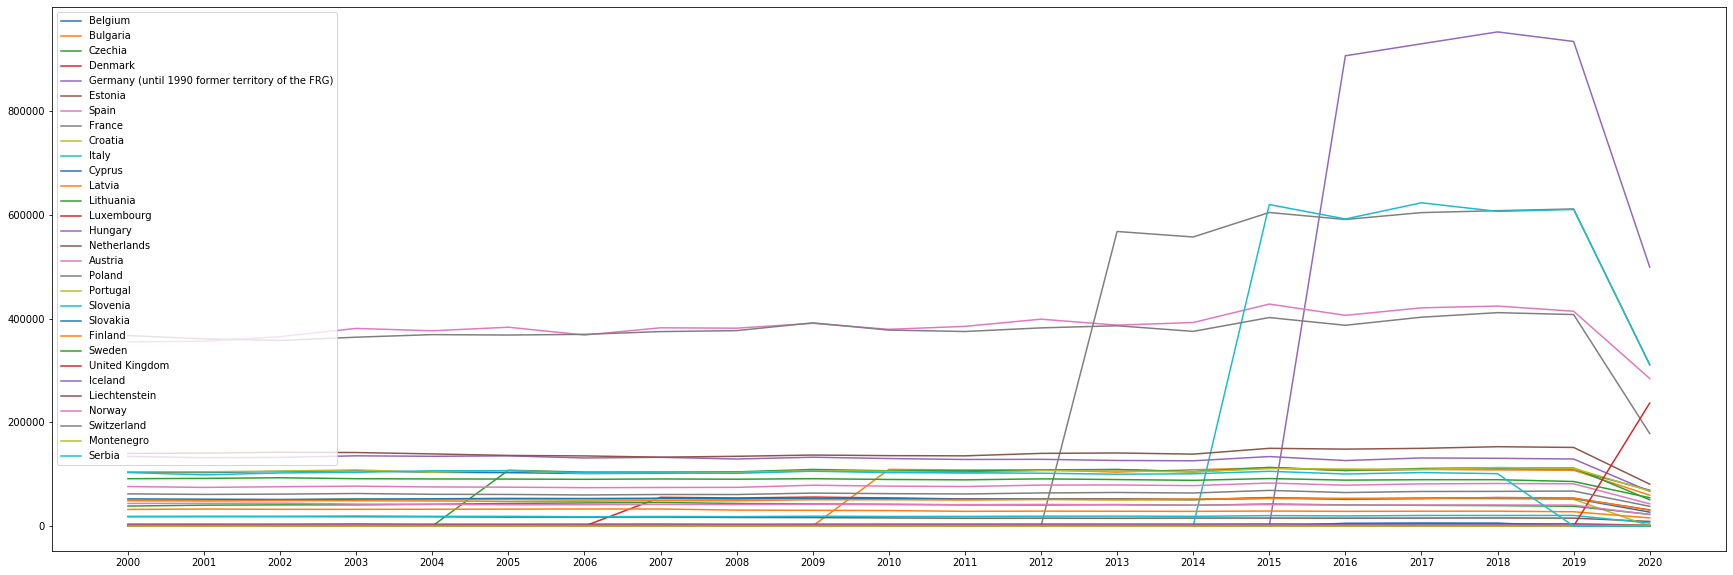

In [63]:
import matplotlib.pyplot as plt
_,ax=plt.subplots(figsize=(30,10))
for pais in paises:
    data_pais = data_anual.loc[data_total.GEO==pais].groupby(['GEO','year']).sum().reset_index()
    ax.plot(data_pais.year, data_pais.Value, label=pais)
plt.legend()
